In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()

In [23]:
model = Sequential()
model.add(Dense(units=1, activation='sigmoid', input_shape=[2,]))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.get_weights()

[array([[-0.5412606],
        [-1.0555968]], dtype=float32),
 array([0.], dtype=float32)]

In [25]:
import numpy as np

example_data = np.array([[2.2,2.1]])
model(example_data)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.03206107]], dtype=float32)>

In [26]:
# Linear Summation + Activation
(2.2*1.28) + (2.1*-1.09) + 0

0.5270000000000001

In [27]:
def sigmoid_demo(z):
  return 1/(1+np.exp(-z))

In [28]:
sigmoid_demo(0.5270)

0.6287831382168909

In [29]:
# Modify the code to accept 3 features, generate output and validate the same


In [30]:
model = Sequential()
model.add(Dense(units=10, activation='sigmoid', input_shape=[2,])) # Hidden Layer
model.add(Dense(units=1, activation='sigmoid')) # Output layer
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

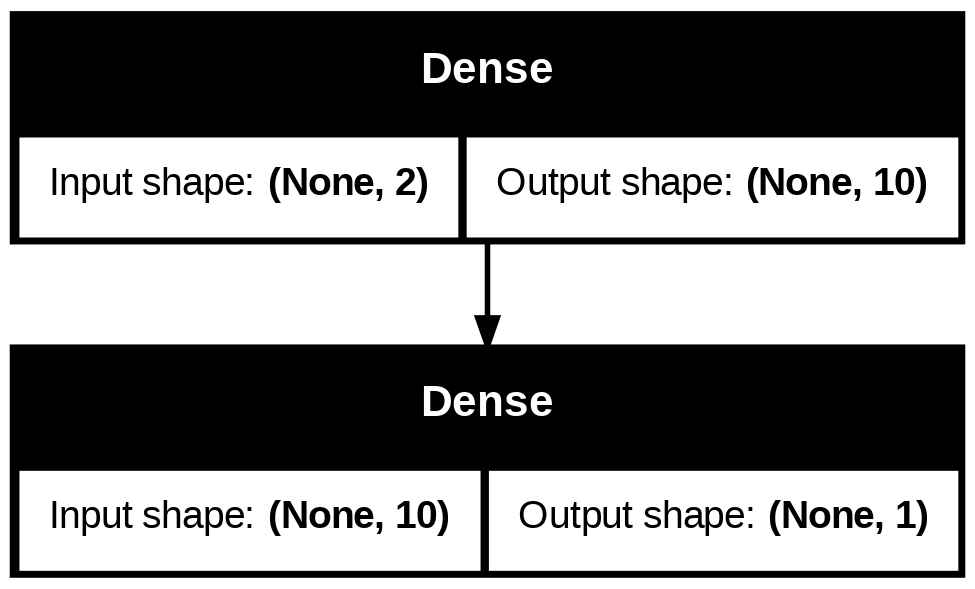

In [31]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [32]:
model = Sequential()
model.add(Dense(units=2, activation='sigmoid', input_shape=[2,])) # Hidden Layer
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 2)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
model(example_data)

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.06391328, 0.01983815]], dtype=float32)>

# Hands On

In [34]:
from tensorflow.keras.datasets import mnist

In [35]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

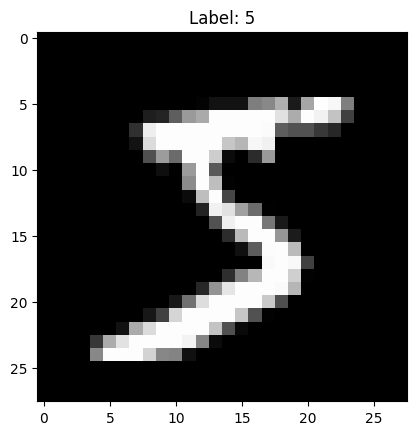

In [37]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()

In [38]:
# have the features in a 1d format
X_train_new = X_train.reshape(60000,28*28) # 60000,784
X_test_new = X_test.reshape(10000,28*28)

In [39]:
X_train_new.shape, X_test_new.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [40]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [44]:
# Preprocessing of the target
# Create One Hot encoding for target data
from tensorflow.keras.utils import to_categorical
y_train_transform = to_categorical(y_train, num_classes=10)
y_test_transform = to_categorical(y_test, num_classes=10)

In [45]:
y_train_transform[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [47]:
np.max(X_train_new),np.min(X_train_new)

(255, 0)

In [ ]:
# Input data preprocessing
X_train_new = X_train_new/255
X_test_new = X_test_new/255

In [41]:
model = Sequential()
model.add(Dense(units = 128, activation='sigmoid', input_shape=[784,]))
model.add(Dense(units = 10, activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer="SGD",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
history = model.fit(X_train_new, y_train_transform, epochs=10,
          validation_data=(X_test_new, y_test_transform))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7303 - loss: 0.9947 - val_accuracy: 0.8995 - val_loss: 0.3873
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8948 - loss: 0.3884 - val_accuracy: 0.9123 - val_loss: 0.3236
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9096 - loss: 0.3289 - val_accuracy: 0.9182 - val_loss: 0.3039
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9187 - loss: 0.2955 - val_accuracy: 0.9227 - val_loss: 0.2761
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9247 - loss: 0.2731 - val_accuracy: 0.9266 - val_loss: 0.2661
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9265 - loss: 0.2652 - val_accuracy: 0.9299 - val_loss: 0.2457
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9324 - loss: 0.2466 - val_accuracy: 0.9360 - val_loss: 0.2324
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9331 - loss: 0.2362 - 

In [51]:
model.evaluate(X_test_new, y_test_transform)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9256 - loss: 0.2448


[0.21988198161125183, 0.9350000023841858]

In [52]:
h = history.history

In [53]:
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

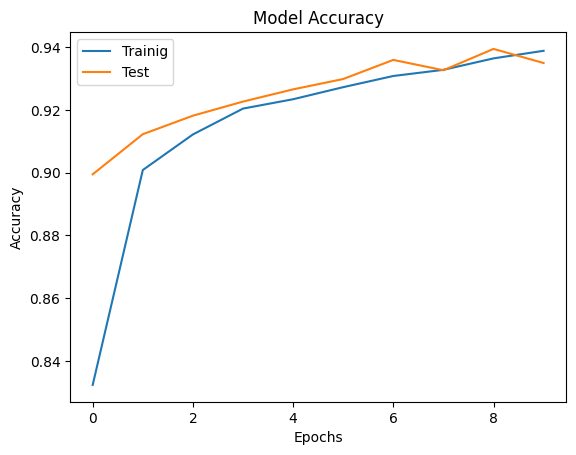

In [54]:
# Accuracy Visualization
plt.plot(h['accuracy'], label="Trainig")
plt.plot(h['val_accuracy'], label="Test")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

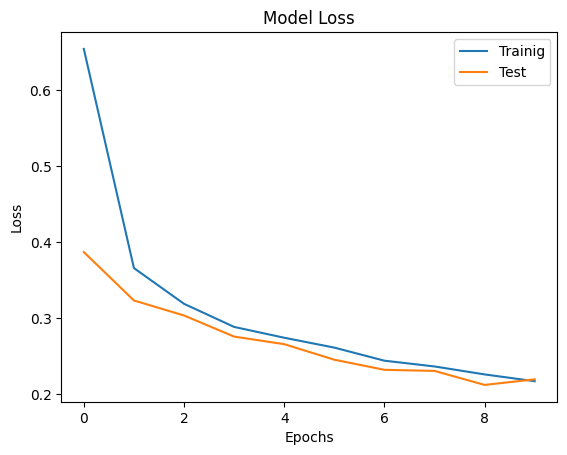

In [55]:
# Accuracy Visualization
plt.plot(h['loss'], label="Trainig")
plt.plot(h['val_loss'], label="Test")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Fashion MNIST

In [48]:
from tensorflow.keras.datasets import fashion_mnist

In [49]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [50]:
X_train.shape

(60000, 28, 28)

In [ ]:
# Create a NN
# compile method
# fit on the dataset
# Report the accuracy on training and test data

# Recommendations
1. Apply Regression on dataset - https://www.kaggle.com/competitions/regression-dataset-activity/overview
2. Binary Classification